In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
from adjustText import adjust_text

In [50]:
df = pd.read_csv("prog-22.csv")

df['Player'] = df['Player'].str.split('\\', expand=True)[0]
# df = df.drop(19)
df = df.drop(17)
# df = df.drop(21)
# df = df.drop(22)
# df = df.drop(16)
# df = df.drop(0)
# df = df.drop(18)
# df = df.drop(24)
df

,Player,Pos,Carries,TotDistCarried,PrgDistCarried,ProgCarries,CarriesFinalThird,CarriesPenaltyArea,MissedCarries,LostCarries,Prog
0,João Cancelo,DF,77.0,338.9,182.6,10.50,3.89,0.83,0.61,0.74,7.73
1,Bernardo Silva,MFFW,54.5,320.9,183.2,10.60,3.15,1.28,1.23,1.10,2.79
2,Rúben Dias,DF,66.0,373.5,232.0,8.60,0.77,0.00,0.19,0.10,3.82
3,Rodri,MF,66.3,267.5,131.2,5.88,1.29,0.15,0.31,0.93,5.67
4,Aymeric Laporte,DF,70.2,429.3,296.4,10.40,1.36,0.05,0.05,0.10,5.92
5,Gabriel Jesus,FW,42.2,203.7,102.3,7.76,1.22,1.56,3.13,2.18,2.79
6,Jack Grealish,FW,51.0,378.4,233.8,14.60,3.33,4.26,1.13,1.99,3.40
7,Raheem Sterling,FW,47.2,227.4,134.7,8.58,1.42,2.16,1.82,3.31,3.38
8,Kyle Walker,DF,67.0,277.0,113.9,4.37,2.07,0.30,0.67,0.30,4.52
9,Kevin De Bruyne,MF,52.3,222.2,137.4,6.97,2.65,0.45,1.44,1.29,6.52


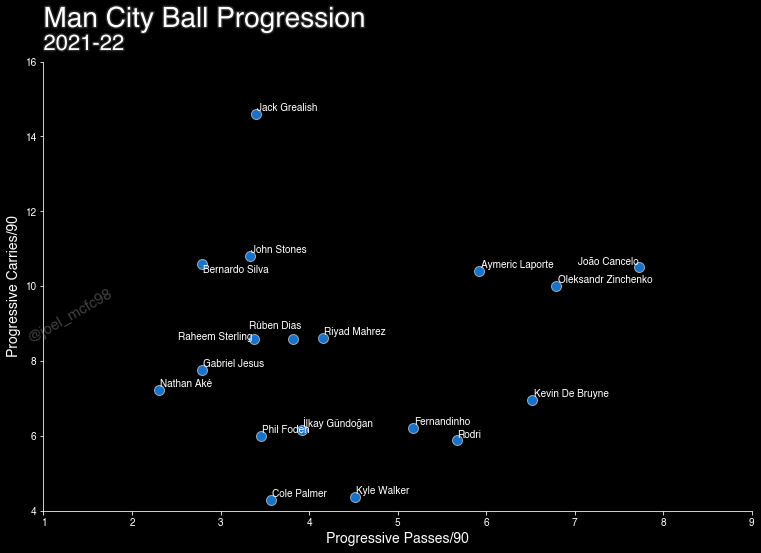

In [51]:
line_color = "silver"
marker_color = "dodgerblue"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(df["Prog"], df["ProgCarries"], s=100, zorder=5, 
               ec=line_color, fc=marker_color, alpha=0.8)
    
    ax.text(0.1, 0.5, '@joel_mcfc98', transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='right', va='top', rotation='30')
    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.Prog, row.ProgCarries, row.Player, fontsize=10, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Progressive Passes/90", ylabel="Progressive Carries/90", ylim=(4, 16), xlim=(1, 9)) ## set labels and limits
    
  
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
#     ax.xaxis.set_ticks(range(-1, 11, 5)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Man City Ball Progression", 
            ha='left', fontsize=28, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="2021-22", ha='left', 
            fontsize=22, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("prog-18", dpi=300)